## Purpose of File
The purpose of this code is to import a video with known timestamps at which the class changes. Then extract the angular features for the front view. Then compare to the ideal techniques resulting in errors for each dimension. This can then be saved and imported in the file "Front Eval" and used to test the FIS.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'grid'])
import sys
sys.path.append("C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Functions")
from Functions_Squat import signed_error, features_front, equal_lengths

In [4]:
con_model = np.load("C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 3\\Technique Modelling\\Models\\Front Concentric.npz")
ecc_model = np.load("C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 3\\Technique Modelling\\Models\\Front Eccentric.npz")
ecc_model['Horizontal Knee Separation']

array([ 0.90028367,  1.4665495 , -0.70737493])

The following cell contains all the timestamps and corresponsing class for many different videos (in the same manner as has been previously used).

In [2]:
#list1 is the times at which the class changes
#list2 is the class label of each time chunk

#For video called 1(6) in correct training data.
# list1 = [0,0.11,0.83,1.4,2.19,2.96,3.56,4.33,5.04,5.64,6.49,7.31,7.81,8.57,9.38,9.93,10.71,11.49,11.97,12.83,13.62,14.06,14.86,15.62,16.1,16.85,17.63]
# list2 = [2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0]

#For video called 1(7) in correct training data
# list1 = [0,1.43,2.14,2.91,3.33,4.06,4.9,5.4,6.15,6.92,7.49,8.28,9.11,9.63,10.31,11.04,11.61,12.34,13.07,13.57,14.28,15.02]
# list2 = [0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0]

#For video called "Caving Knees"
list1 = [0, 3.12, 4.38, 6.35, 7.62,8.83,10.71,11.77,13.04,14.8,15.98,17.4,19.37,20.09,21.57,23.43,24.06,25.5,27.13,28.12,29.48,31.15,32.87,34.47,35.89,36.74,38.6,39.78,40.74,42.24,43.95]
list2 = [0, 2, 1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0]

#For video called "Wide Knees"
# list1 = [0,2.34,3.57,4.74,5.94,7.12,8.86,9.82,11.16,12.63,14.08,15.64,17.25,18.08,19.83,21.2,22.03,23.5,24.65,25.46,27,28.49]
# list2 = [0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0]

#For video called "Feet Very Wide"
# list1 = [0,2.18,3.5,4.56,5.33,6.87,8.08,9.04,10.43,11.82]
# list2 = [0,2,1,0,2,1,0,2,1,0]

#For Video called "Feet Moderately Wide"
# list1 = [0,1.09,2.25,3.56,4.33,5.75,6.87,7.79,9.12,10.22,11.21,12.47,13.72]
# list2 = [0,2,1,0,2,1,0,2,1,0,2,1,0]

#For Video called "Feet ModeratelyVery Wide"
# list1 = [0,1.04,2.18,3.22,3.92,5.53,6.64]
# list2 = [0,2,1,0,2,1,0]

#For Video called "Feet Moderately Close"
# list1 = [0,1.06,2.77,3.9,4.76,6.44,7.92,8.72,10.55,11.85]
# list2 = [0,2,1,0,2,1,0,2,1,0]

#For Video called "Feet Very Close"
# list1 = [0,0.32,2.23,3.47,4.39,5.98,7.1,8.37,10.1,11.55]
# list2 = [0,2,1,0,2,1,0,2,1,0]

#For Video called "Back Angle (front)"
# list1 = [0,2.35,3.66,4.68,5.97,7.26,8.31,10.74,11.82,12.97,13.69,14.96,16,18.83,20.08,21.15,22.09,23.38,24.55,26.04,27.23,28.33,29.15,30.42,31.5]
# list2 = [0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0]

len(list1),len(list2)

(31, 31)

The following cell extracts the correct angular/distance features for the front camera perspective.

In [3]:
#initiallize empty lists
con = []
ecc = []

path = "C:\\Users\\Cian\\Downloads\\Squat Training\\Caving Knees.mp4"
# path = "C:\\Users\\Cian\\Downloads\\Squat Vids\\1 (7).mp4"
Features = features_front(path)
print(Features.shape)

#Loop through list2
for j in range(len(list2)):
    if list2[j] == 0 or j==0:
        pass
    elif list2[j] == 1:
        #find the index range that will extract the correct range of angles. Note that the FPS of the video is 15.
        ind1 = int(list1[j]*15)
        ind2 = int(list1[j+1]*15)
        #append the angles within this range to the concentric list above "con"
        con.append(Features[ind1:ind2])
    elif list2[j] == 2:
        #find the index range that will extract the correct range of angles. Note that the FPS of the video is 15.
        ind1 = int(list1[j]*15)
        ind2 = int(list1[j+1]*15)

        #append the angles within this range to the concentric list above "con"
        ecc.append(Features[ind1:ind2])

(695, 4)


The following cell imports the regression models previously developed (some are linear and some are quadratic), then calculates the error for each category.

In [4]:
N = 200

con_eq = equal_lengths(con,N)
ecc_eq = equal_lengths(ecc,N)

con_eq[:,:,0] = np.rad2deg(con_eq[:,:,0])
ecc_eq[:,:,0] = np.rad2deg(ecc_eq[:,:,0])

con_model = np.load("C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 3\\Technique Modelling\\Models\\Front Concentric.npz")
ecc_model = np.load("C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 3\\Technique Modelling\\Models\\Front Eccentric.npz")

time = np.linspace(0,1,N)
T = np.stack((np.ones(N),time))
T2 = np.stack((np.ones(N),time,time**2))

con_corr0 = np.rad2deg(np.arctan2(con_model['Torso'][1]@T,con_model['Torso'][0]@T)).reshape(N,1)
con_corr1 = (con_model['Horizontal Knee Separation']@T2).reshape(N,1)
con_corr2 = (con_model['Horizontal Foot Separation']@T).reshape(N,1)
con_corr = np.concatenate((con_corr0, con_corr1, con_corr2),axis=1)

ecc_corr0 = np.rad2deg(np.arctan2(ecc_model['Torso'][1]@T,ecc_model['Torso'][0]@T)).reshape(N,1)
ecc_corr1 = (ecc_model['Horizontal Knee Separation']@T2).reshape(N,1)
ecc_corr2 = (ecc_model['Horizontal Foot Separation']@T).reshape(N,1)
ecc_corr = np.concatenate((ecc_corr0, ecc_corr1, ecc_corr2),axis=1)

#now find error
con_err = con_eq[:,:,:-1]-con_corr
ecc_err = ecc_eq[:,:,:-1]-ecc_corr
con_model

NpzFile 'C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 3\\Technique Modelling\\Models\\Front Concentric.npz' with keys: Torso, Horizontal Knee Separation, Horizontal Foot Separation, Vertical Hip to knees

The following cell only has the purpose of plotting the actual trajectory, model trajectory and the error for concentric and eccentric contraction. The variables rep and feat can be changed to choose which feature (category) and which repetition to plot.

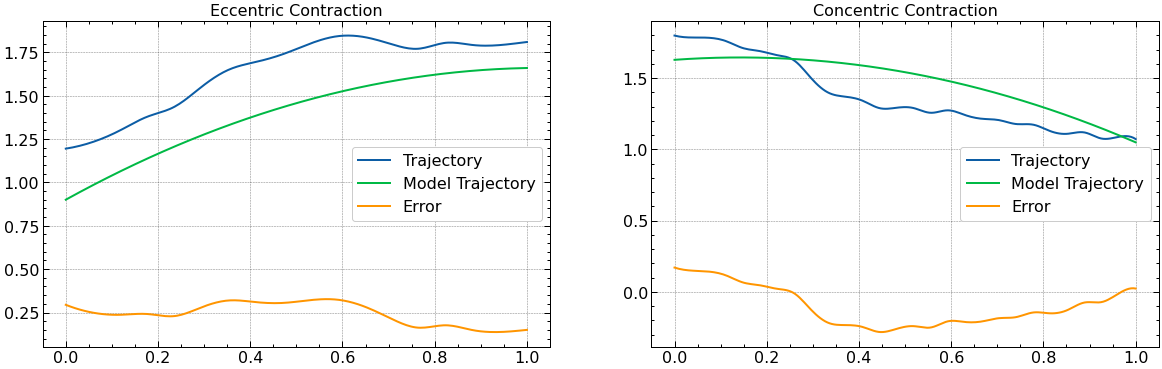

In [12]:
rep = 1
feat = 1
t = np.linspace(0,1,con_eq.shape[1])

#plot first
if feat==0:
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    ax1.plot(t,ecc_eq[rep,:,feat], label='Trajectory')
    ax1.plot(t,ecc_corr[:,feat], label='Model Trajectory')
    ax1.plot(t,ecc_err[rep,:,feat],label='Error')
    ax1.legend()
    ax1.set_title('Eccentric Contraction')
    ax1.set_ylim(-180,180)

    ax2.plot(t,con_eq[rep,:,feat], label='Trajectory')
    ax2.plot(t,con_corr[:,feat], label='Model Trajectory')
    ax2.plot(t,con_err[rep,:,feat],label='Error')
    ax2.legend()
    ax2.set_title('Concentric Contraction')
    ax2.set_ylim(-180,180)
    
else:
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    ax1.plot(t,ecc_eq[rep,:,feat], label='Trajectory')
    ax1.plot(t,ecc_corr[:,feat], label='Model Trajectory')
    ax1.plot(t,ecc_err[rep,:,feat],label='Error')
    ax1.legend()
    ax1.set_title('Eccentric Contraction')

    ax2.plot(t,con_eq[rep,:,feat], label='Trajectory')
    ax2.plot(t,con_corr[:,feat], label='Model Trajectory')
    ax2.plot(t,con_err[rep,:,feat],label='Error')
    ax2.legend()
    ax2.set_title('Concentric Contraction')

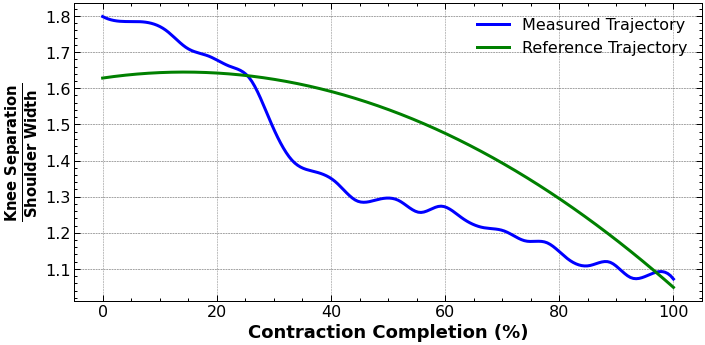

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Example data setup (replace with your actual arrays)
rep = 1
feat = 1
t = np.linspace(0, 1, con_eq.shape[1])

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(t * 100, con_eq[rep, :, feat], label='Measured Trajectory', color='blue', linewidth=3)
plt.plot(t * 100, con_corr[:, feat], label='Reference Trajectory', color='green', linewidth=3)

# Add labels and styling
plt.xlabel('Contraction Completion (%)', fontsize=18, weight='bold')
plt.ylabel(r'$\frac{\mathbf{Knee\ Separation}}{\mathbf{Shoulder\ Width}}$', fontsize=21)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize=16, loc='best', frameon=False)  # Cleaner legend without box
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()
plt.savefig("C:\\Users\\Cian\\Downloads\\final_feedback_traj.png", dpi=600, bbox_inches='tight', pad_inches=0.1)
# Show the plot
plt.show()

The following cell splits each repetition into three sections: beginning, middle and end. The errors in each of these three sections is averaged. The result is two arrays (one for concetric and one for eccentric) containing the three mean errors for each repetition.

The dimensions of the arrays are as follows:
- rep number
- section of rep (beginning, middle, end)
- feature

In [27]:
#first acquire the means for all concentric repetitions
means_con = []
for i in range(len(con_err)):
    stages = np.array_split(con_err[i,:,:],3)
    means_con.append([np.mean(stage[np.argsort(np.abs(stage),axis=0), np.arange(con_err.shape[2])][-15:],axis=0) for stage in stages])
    
means_con = np.transpose(np.array(means_con),(1,0,2))

#first acquire the means for all concentric repetitions
means_ecc = []
for i in range(len(ecc_err)):
    stages = np.array_split(ecc_err[i,:,:],3)
    means_ecc.append([np.mean(stage[np.argsort(np.abs(stage),axis=0), np.arange(con_err.shape[2])][-15:],axis=0) for stage in stages])
    
means_ecc = np.transpose(np.array(means_ecc),(1,0,2))

Now process the "hip to knees" data. The purpose of this category is to detect when the repetition is not complete. I will extract two values for each repetition:
- Percentage depth, i.e. 100% is exactly at the correct squatting depth.
- Percentage height (less important), i.e. 100% is at exactly the correct height (standing up straight).

In [28]:
#Extract the modelled path for concentric and eccentric
con_corr3 = (con_model['Vertical Hip to knees']@T2).reshape(N,1)
ecc_corr3 = (ecc_model['Vertical Hip to knees']@T2).reshape(N,1)

#Extract the first and last values from each. Create and array where the top is the first index and bottom is the second.
con_range = np.array([con_corr3[-1], con_corr3[0]]).flatten()
ecc_range = np.array([ecc_corr3[0], ecc_corr3[-1]]).flatten()

#Extract the top and bottom values for each actual path. Do this by averaging 10 values (avoiding outliers)
con_act_range = np.stack((np.mean(con_eq[:,-10:,-1],axis=1), np.mean(con_eq[:,:10,-1],axis=1))).T
ecc_act_range = np.stack((np.mean(ecc_eq[:,:10,-1],axis=1), np.mean(ecc_eq[:,-10:,-1],axis=1))).T

#for each rep find the percentage depth and percentage height
con_height = (con_act_range[:,0] - con_range[1])/(con_range[0] - con_range[1])
ecc_height = (ecc_act_range[:,0] - ecc_range[1])/(ecc_range[0] - ecc_range[1])
con_depth =  (con_act_range[:,1] - con_range[0])/ (con_range[1] - con_range[0])
ecc_depth = (ecc_act_range[:,1] - ecc_range[0])/(ecc_range[1] - ecc_range[0])

#now combine into two arrays, one for concentric and one for eccentric. Column 1 should be height, and column 1 depth
con_par_rep = np.stack((con_height, con_depth)).T
ecc_par_rep = np.stack((ecc_height, ecc_depth)).T
con_par_rep,ecc_par_rep

(array([[0.94902787, 0.81372856],
        [0.94702909, 0.83201943],
        [0.91225749, 0.89290097],
        [0.946865  , 0.95769778],
        [0.96279394, 0.82510822],
        [0.89221935, 0.7577704 ],
        [0.90517836, 0.911826  ],
        [0.92946298, 0.65708944],
        [0.95559037, 0.51708598],
        [0.94342673, 0.55613111]]),
 array([[0.93656333, 0.87236599],
        [0.87342207, 0.90289461],
        [0.93092376, 0.99004731],
        [0.94267426, 1.06723186],
        [0.98513242, 0.91419244],
        [0.940988  , 0.83708707],
        [0.93649301, 0.98725981],
        [0.91232827, 0.72093955],
        [0.91099262, 0.60118931],
        [0.94499795, 0.60086943]]))

Save the data.

In [29]:
np.savetxt("C:\\Users\\Cian\\Downloads\\con_torsofront.txt", means_con[:,:,0])
np.savetxt("C:\\Users\\Cian\\Downloads\\con_knee.txt", means_con[:,:,1])
np.savetxt("C:\\Users\\Cian\\Downloads\\con_foot.txt", means_con[:,:,2])
np.savetxt("C:\\Users\\Cian\\Downloads\\con_par_rep.txt", con_par_rep)

np.savetxt("C:\\Users\\Cian\\Downloads\\ecc_torsofront.txt", means_ecc[:,:,0])
np.savetxt("C:\\Users\\Cian\\Downloads\\ecc_knee.txt", means_ecc[:,:,1])
np.savetxt("C:\\Users\\Cian\\Downloads\\ecc_foot.txt", means_ecc[:,:,2])
np.savetxt("C:\\Users\\Cian\\Downloads\\ecc_par_rep.txt", ecc_par_rep)